## Análise exploratória dos dados

No primeiro momento, foi realizado uma análise exploratória dos dadaset afim de verificar possíveis inconsistências nos dados.

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [54]:
# Dados
# customer original
df_customer = pd.read_csv("dados/customer_original.csv")

# customer nps
df_nps = pd.read_csv("dados/customer_nps.csv")

# sutomer social
df_social = pd.read_csv("dados/customer_social.csv")



In [ ]:
df_customer.head(15)

In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7234 non-null   int64  
 1   PhoneService      7234 non-null   object 
 2   MultipleLines     7234 non-null   object 
 3   InternetService   7234 non-null   object 
 4   OnlineSecurity    7234 non-null   object 
 5   OnlineBackup      7234 non-null   object 
 6   DeviceProtection  7234 non-null   object 
 7   TechSupport       7234 non-null   object 
 8   StreamingTV       7234 non-null   object 
 9   StreamingMovies   7234 non-null   object 
 10  Contract          7234 non-null   object 
 11  PaperlessBilling  7234 non-null   object 
 12  PaymentMethod     7234 non-null   object 
 13  MonthlyCharges    7234 non-null   float64
 14  TotalCharges      7234 non-null   float64
 15  Churn             7234 non-null   object 
 16  cpf               7234 non-null   object 


In [55]:
print(f"Duplicatas completas: {df_customer.duplicated().sum()}")

Duplicatas completas: 168


In [56]:
df_customer.duplicated().value_counts()

False    7066
True      168
Name: count, dtype: int64

In [57]:
# Limpando os CPFs 
df_customer['cpf'] = df_customer['cpf'].str.replace(r'\D', '', regex=True)


In [ ]:
# Checando duplicatas
df_customer[df_customer.duplicated(subset='cpf', keep=False)]


Foram identificados valores duplicados de CPF que foram posteriormente removidos

In [9]:
#cpfs_repetidos = df_customer['cpf'][df_customer['cpf'].duplicated()].unique()#
#print(cpfs_repetidos)

In [59]:
df_customer=df_customer.drop_duplicates(subset='cpf', keep='first')
#df_customer[df_customer.duplicated(subset='cpf', keep=False)]

df_customer.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [60]:
# Verificando NAs
df_customer[df_customer.isna().any(axis=1)]
# Resultados sem NAs

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf


In [61]:
df_nps.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [62]:
df_social.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [63]:
df_nps=df_nps.drop_duplicates(subset='cpf', keep='first')
df_nps.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [64]:
df_social=df_social.drop_duplicates(subset='cpf', keep='first')
df_social.duplicated().value_counts()


False    7065
Name: count, dtype: int64

In [16]:
#assert df_customer['cpf'].equals(df_nps['cpf']) and df_customer['cpf'].equals(df_social['cpf']), "CPFs não estão na mesma ordem!"

In [65]:
for df in [df_customer, df_nps, df_social]:
    df['cpf'] = (
        df['cpf']
        .astype(str)              
        .str.replace(r'\.|\-| ', '', regex=True)  
        .str.zfill(11)            
    )

In [18]:
#df_nps.info()
#df_customer.info()
#df_social.info()

Os três bancos de dados foram unidos, usando o CPf com chave primária

In [ ]:
# Juntando os bancos de dados
df_temp = pd.merge(df_customer, df_nps, on='cpf', how='inner')
df_final = pd.merge(df_temp, df_social, on='cpf', how='inner')
#df_final.head(25)

In [ ]:
df_final.duplicated().value_counts()
#df_final.to_csv("datasets_unidos.csv", index=False, encoding="utf-8")

False    7065
Name: count, dtype: int64

In [88]:
# Contagem dos CPFs para verificar se os valores são únicos
df_final['cpf'].value_counts()

cpf
20410372883    1
10433218100    1
96001338914    1
08386379499    1
02654235114    1
              ..
26916697857    1
53287101269    1
23884969692    1
39537672409    1
35030564160    1
Name: count, Length: 7065, dtype: int64

Foram identificados valores altos (outliers) nas variávei **TotalCharges** e **MonthlyCharges**, que foram removidos. Vale ressaltar que estes valores foram removidos apenas por critério de magnitude, seria necessário avaliar melhor o contexto dos contratos dos CFPs envolvidos.

In [ ]:
sns.boxplot(data=df_final, x='TotalCharges')
sns.boxplot(data = df_final, x = 'MonthlyCharges')

In [ ]:
# remoção dos outliers

colunas_numericas = ['TotalCharges', 'MonthlyCharges']

df_limpo = df_final.copy()

for coluna in colunas_numericas:
    Q3 = df_limpo[coluna].quantile(0.75)
    limite_superior = Q3 + 1.5 * (Q3 - df_limpo[coluna].quantile(0.25))
    df_limpo = df_limpo[df_limpo[coluna] <= limite_superior]

df_limpo[colunas_numericas].describe()

df_limpo.describe()


,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen,churn_bin,TotalServicosContratados
count,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000
mean,32.414558,64.807229,2282.828874,7.154677,0.162354,0.265852,3.363662
std,24.545564,30.086461,2266.625162,2.649100,0.368802,0.441817,2.061880
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.612500,401.350000,5.000000,0.000000,0.000000,1.000000
50%,29.000000,70.350000,1397.100000,8.000000,0.000000,0.000000,3.000000
75%,55.000000,89.900000,3793.775000,9.000000,0.000000,1.000000,5.000000
max,72.000000,118.750000,8684.800000,10.000000,1.000000,1.000000,8.000000


In [133]:
df_limpo['TotalServicosContratados'].isna().value_counts()

# Na tabelas df_limpo.discribe(), há total de serviços contratados com valores 0, o que indica possível  inconsistência nos dados, então
#decidir remover todos os CPFs com zero serviços contratados, ao todo foram 80 observações.
df_limpo = df_limpo[df_limpo['TotalServicosContratados'] > 0]

# Também foram removidos NPS com valores iguais a zero, visto que a escala é de 1-10
df_limpo = df_limpo[df_limpo['NPS'] > 0]

In [134]:
df_limpo.describe()


,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen,churn_bin,TotalServicosContratados
count,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000
mean,32.723830,65.232527,2309.164910,7.193233,0.161411,0.263067,3.401872
std,24.515208,29.954747,2268.810826,2.631471,0.367936,0.440330,2.042794
min,1.000000,18.250000,18.800000,1.000000,0.000000,0.000000,1.000000
25%,9.000000,39.450000,417.700000,5.000000,0.000000,0.000000,2.000000
50%,29.000000,70.600000,1423.150000,8.000000,0.000000,0.000000,3.000000
75%,56.000000,90.000000,3842.600000,9.000000,0.000000,1.000000,5.000000
max,72.000000,118.750000,8684.800000,10.000000,1.000000,1.000000,8.000000


## Análise Descritiva

Nesta sessão será feita a análise descritiva para as variáveis **Churn** e **NPS**

### Análise descritiva para variável Churn

Com a atual base de dados, em que foram feitas suas devidas limpezas e ajustes. Foi identificado um **Churn** de aproximadamente 26%

In [135]:
# Quantidade de Churn
df_limpo[["Churn"]].value_counts(normalize=True)*100

Churn
No       73.693305
Yes      26.306695
Name: proportion, dtype: float64

Em um primeiro momento, buscou-se avaliar o Churn pela quantidade de serviços contratados, com o objetivo de averiguar se a quantidade de serviços contratados iria influenciar no **Churn**.

In [136]:
df_limpo['churn_bin'] = df_limpo['Churn'].map({'Yes':1, 'No':0})

servicos = [
    'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_limpo['TotalServicosContratados'] = df_limpo[servicos].apply(
    lambda x: sum(x == 'Yes'), axis = 1
)

#print(df_limpo[['cpf', 'TotalServicosContratados']].head())

In [175]:
tabela_churn = pd.crosstab(
    df_limpo['TotalServicosContratados'],
    df_limpo['churn_bin'],
    margins=True,
    margins_name="Total"
)

tabela_churn['% Churn'] = (tabela_churn[1] / tabela_churn['Total'] * 100).round(1)
#tabela_churn['% Fidelidade'] = (tabela_churn[0] / tabela_churn['Total'] * 100).round(1)

tabela_churn = tabela_churn.rename(columns={
    0: 'Não Churn',
    1: 'Churn'
})

print("Relação entre Quantidade de Serviços e Churn:")
print(tabela_churn.to_string())

Relação entre Quantidade de Serviços e Churn:
churn_bin                 Não Churn  Churn  Total  % Churn
TotalServicosContratados                                  
1                              1338    359   1697     21.2
2                               796    389   1185     32.8
3                               612    352    964     36.5
4                               633    283    916     30.9
5                               674    232    906     25.6
6                               522    152    674     22.6
7                               346     49    395     12.4
8                               197     11    208      5.3
Total                          5118   1827   6945     26.3


Nota-se que com aumento de serviços contratados, o **Churn** diminui, logo podemos pensar em uma estratégia de vendas de pacotes de serviços.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_limpo,
    x='TotalServicosContratados',
    y='MonthlyCharges',
    hue='churn_bin',
    palette={0: 'green', 1: 'red'}
)
plt.title('Distribuição de Valores Mensais por Número de Serviços')
plt.show()

In [139]:
var_num  = df_limpo.select_dtypes(include=['int64']).columns.tolist()
var_num = [col for col in var_num if col not in ['churn_bin', 'TotalServicosContratados']] 

In [140]:
def calculate_churn_rate(df, column):
    return (df.groupby(column)['churn_bin']
            .mean()
            .mul(100)
            .round(2)
            .reset_index()
            .rename(columns={'churn_bin': 'Churn'}))

for col in var_num:
    print(f"\n**Churn Rate para {col}:**")
    churn_df = calculate_churn_rate(df_limpo, col)
    display(churn_df)
    
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")


**Churn Rate para tenure:**


,tenure,Churn
0,1,61.83
1,2,51.53
2,3,46.11
3,4,46.51
4,5,48.46
...,...,...
67,68,9.00
68,69,8.42
69,70,9.24
70,71,3.53


-> Maior Churn: '1.0' com 61.83%

**Churn Rate para NPS:**


,NPS,Churn
0,1,86.82
1,2,74.70
2,3,66.17
3,4,55.24
4,5,45.34
5,6,34.51
6,7,28.68
7,8,19.14
8,9,7.74
9,10,2.24


-> Maior Churn: '1.0' com 86.82%

**Churn Rate para SeniorCitizen:**


,SeniorCitizen,Churn
0,0,23.51
1,1,40.86


-> Maior Churn: '1.0' com 40.86%


Podemos notar que o Churn diminui de acordo com aumento de permanencia do individuo com o contrato de serviços (medido na variável **tenure**). Para fins práticos a variável será categorizada para entender melhor os períodos mais propensos ao cancelamento. 

In [171]:
bins = [1, 6, 12, 24, 48, 60, float('inf')]  
labels = [
    '1-6m',   
    '7-12m', 
    '13-24m', 
    '25-48m', 
    '49-60m', 
    '60m+'
]

df_limpo['tenure_cat'] = pd.cut(
    df_limpo['tenure'],
    bins=bins,
    labels=labels,
    right=False
)

print("\nDistribuição por categoria:")
print(df_limpo['tenure_cat'].value_counts().sort_index())


Distribuição por categoria:
tenure_cat
1-6m      1303
7-12m      689
13-24m    1035
25-48m    1616
49-60m     819
60m+      1483
Name: count, dtype: int64


In [172]:
churn_table = (df_limpo.groupby('tenure_group')['churn_bin']
               .agg(['count', 'mean'])
               .rename(columns={'count': 'Total_Clientes', 'mean': 'Taxa_Churn'}))

churn_table['Taxa_Churn'] = (churn_table['Taxa_Churn'] * 100).round(1).astype(str) + '%'

print("\nAnálise de Churn por Tempo de Permanência:")
print(churn_table)


Análise de Churn por Tempo de Permanência:
              Total_Clientes Taxa_Churn
tenure_group                           
1-6 meses               1303      54.3%
7-12 meses               689      36.6%
13-24 meses             1035      29.7%
25-36 meses              871      22.0%
37-48 meses              745      19.6%
49+ meses               1940      11.1%


/tmp/ipykernel_1076/3384091045.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_table = (df_limpo.groupby('tenure_group')['churn_bin']


In [173]:
#  tabela resumo
tabela_simples = (df_limpo.groupby('tenure_cat')['churn_bin']
                  .agg(['count', 'mean'])
                  .rename(columns={
                      'count': 'Total Clientes',
                      'mean': 'Taxa Churn'
                  }))

tabela_simples['Taxa Churn'] = (tabela_simples['Taxa Churn'] * 100).round(1).astype(str) + '%'

print("Taxa de Churn por Tempo de Permanência:")
print(tabela_simples)

Taxa de Churn por Tempo de Permanência:
            Total Clientes Taxa Churn
tenure_cat                           
1-6m                  1303      54.3%
7-12m                  689      36.6%
13-24m                1035      29.7%
25-48m                1616      20.9%
49-60m                 819      15.0%
60m+                  1483       6.7%


/tmp/ipykernel_1076/2232545065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_simples = (df_limpo.groupby('tenure_cat')['churn_bin']


/tmp/ipykernel_1076/2783234646.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_1076/2783234646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


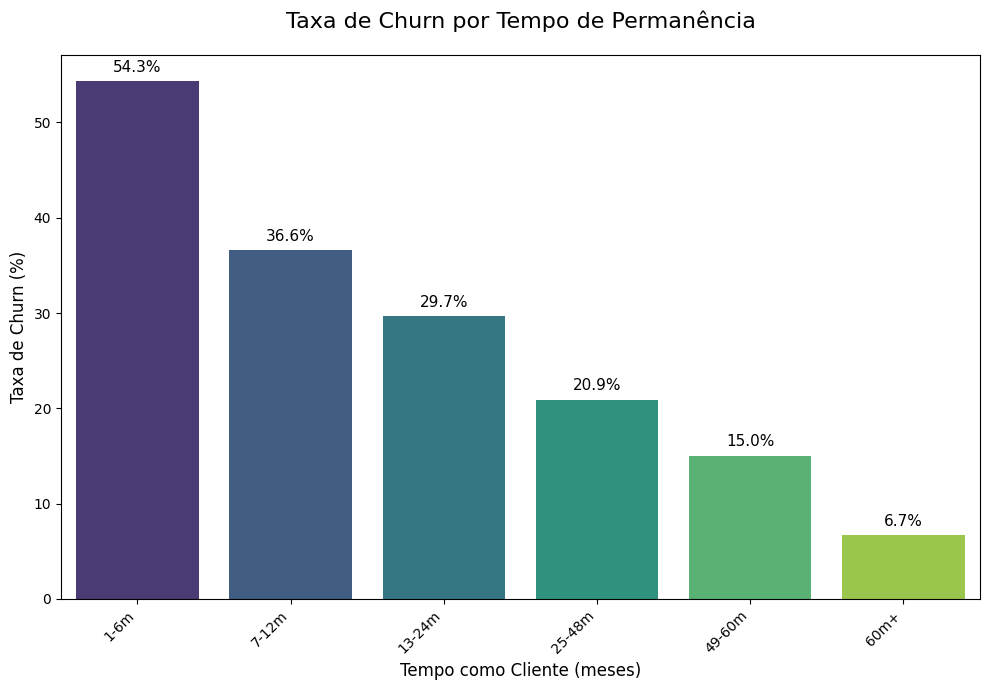

In [174]:
plt.figure(figsize=(10, 7))

ax = sns.barplot(
    data=df_limpo,
    x='tenure_cat',
    y='churn_bin',
    estimator=lambda x: sum(x) / len(x) * 100,
    ci=None,
    palette='viridis',  
    order=['1-6m', '7-12m', '13-24m', '25-48m', '49-60m', '60m+']
)

plt.title('Taxa de Churn por Tempo de Permanência', fontsize=16, pad=20)
plt.xlabel('Tempo como Cliente (meses)', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

ax.grid(False) 

for spine in ax.spines.values():
    spine.set_visible(True)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=11
    )

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Com é possível observar no gráfico acima, nota-se que a maior porcentagem de Churn, se concetra nos primeiros seis meses de contrato até  um ano. Decaíndo até 7%, aproximadamente, para mais de cinco anos de contrato.

Foi avaliado as variáveis contínuas **Total Charges** e **Monthly Charges**. Podemos notar que para o **Churn (Yes)**, se concetra no Monthly Charges no valores de 70 e 110. 

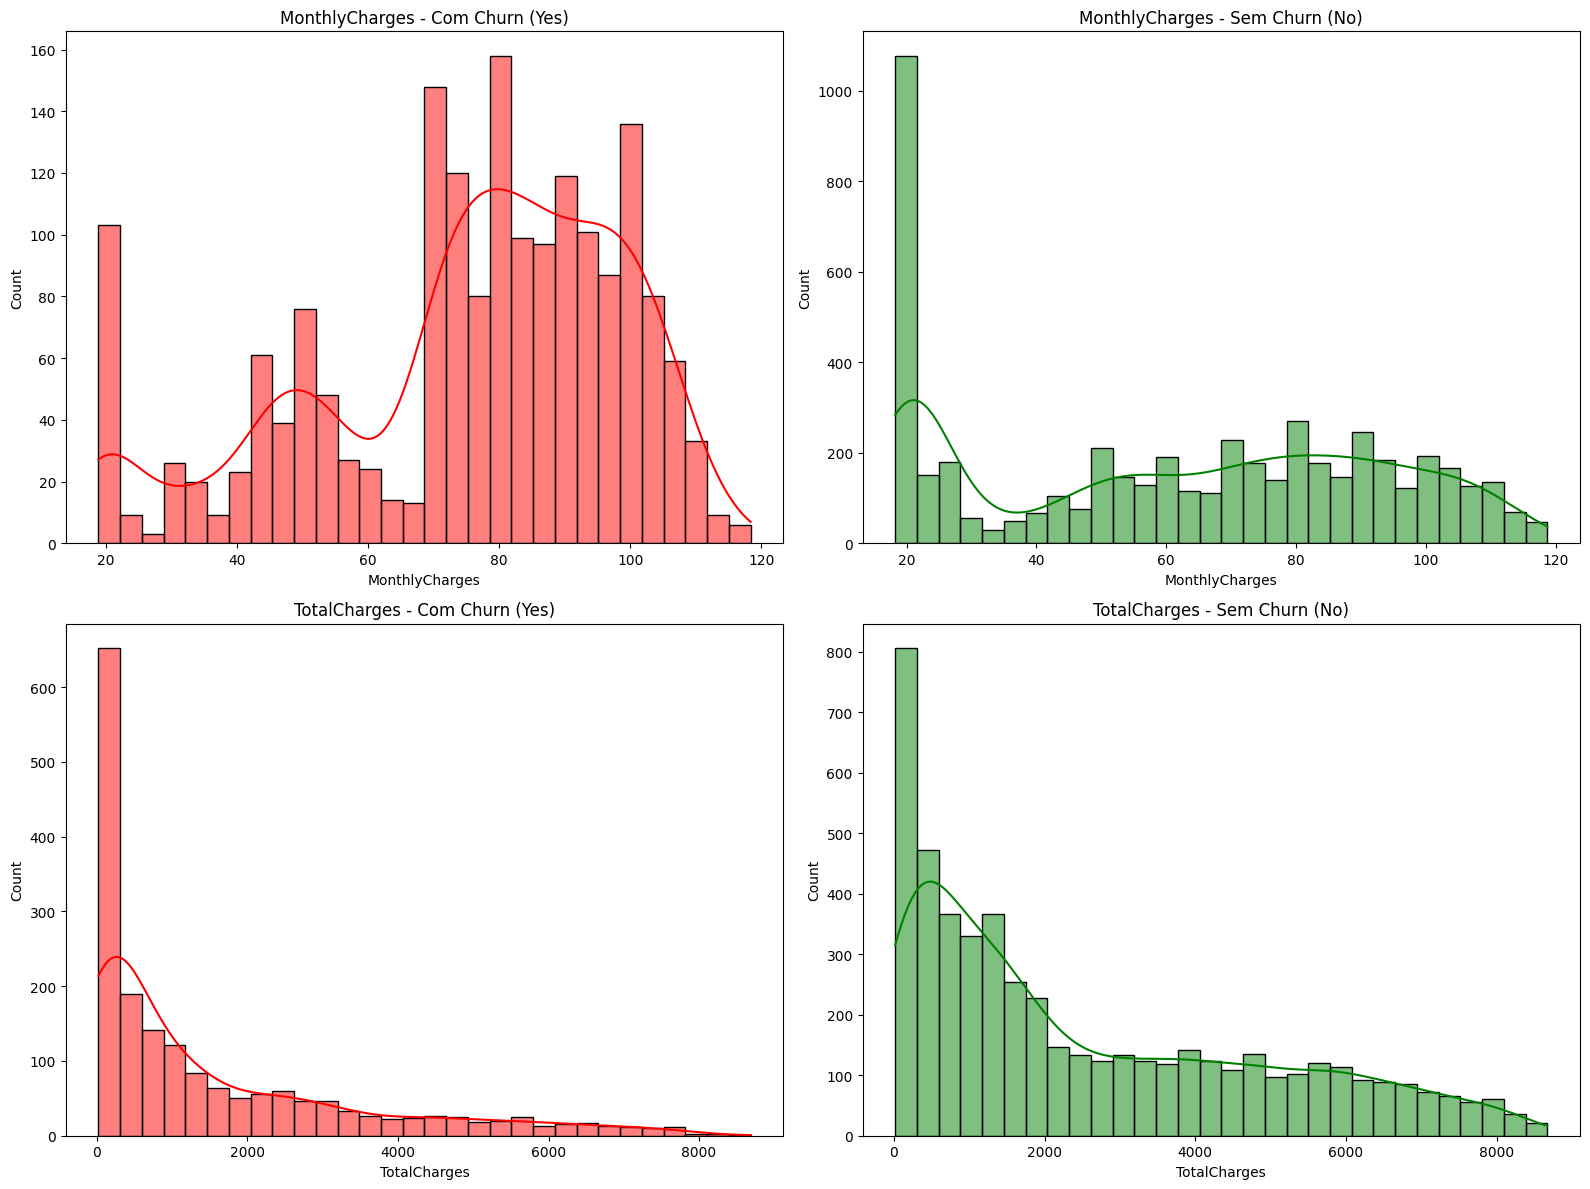

In [ ]:
plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'Yes'], 
             x='MonthlyCharges', color='red', bins=30, kde=True)
plt.title('MonthlyCharges - Com Churn (Yes)')

plt.subplot(2, 2, 2)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'No'], 
             x='MonthlyCharges', color='green', bins=30, kde=True)
plt.title('MonthlyCharges - Sem Churn (No)')

plt.subplot(2, 2, 3)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'Yes'], 
             x='TotalCharges', color='red', bins=30, kde=True)
plt.title('TotalCharges - Com Churn (Yes)')

plt.subplot(2, 2, 4)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'No'], 
             x='TotalCharges', color='green', bins=30, kde=True)
plt.title('TotalCharges - Sem Churn (No)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1076/3895898424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='MonthlyCharges',
/tmp/ipykernel_1076/3895898424.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='TotalCharges',


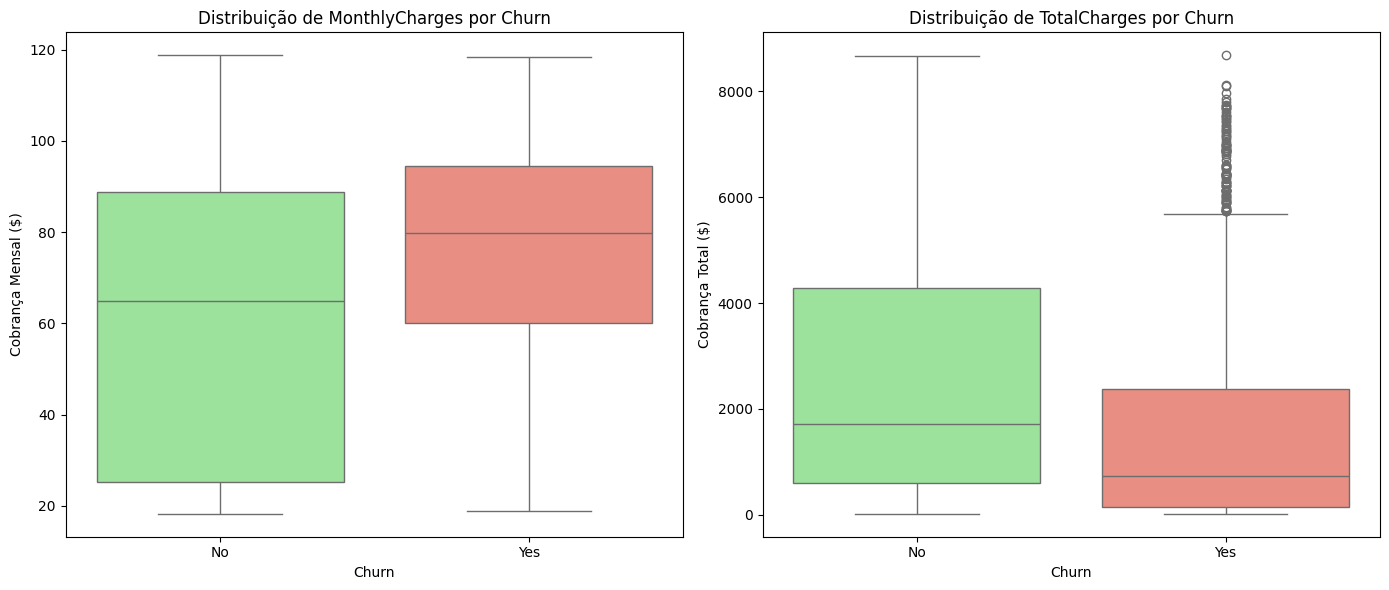

In [ ]:
plt.figure(figsize=(14, 6))

# MonthlyCharges
plt.subplot(1, 2, 1)
sns.boxplot(data=df_limpo, x='Churn', y='MonthlyCharges', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de MonthlyCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal ($)')

# TotalCharges
plt.subplot(1, 2, 2)
sns.boxplot(data=df_limpo, x='Churn', y='TotalCharges', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de TotalCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Total ($)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_1076/1822097320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='tenure',


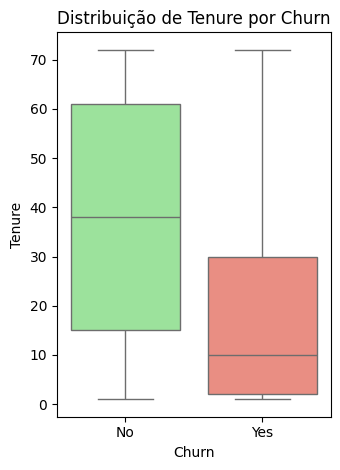

In [182]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_limpo, x='Churn', y='tenure', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.tight_layout()
plt.show()

Análise para as variáveis categóricas

In [176]:
cat_cols = df_limpo.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Churn', 'cpf']] 

In [177]:
def calculate_churn_rate(df, column):
    return (df.groupby(column)['churn_bin']
            .mean()
            .mul(100)
            .round(2)
            .reset_index()
            .rename(columns={'churn_bin': 'Churn'}))

for col in cat_cols:
    print(f"\n**Churn Rate para {col}:**")
    churn_df = calculate_churn_rate(df_limpo, col)
    display(churn_df)
    
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")


**Churn Rate para PhoneService:**


,PhoneService,Churn
0,No,22.50
1,Yes,26.67


-> Maior Churn: 'Yes' com 26.67%

**Churn Rate para MultipleLines:**


,MultipleLines,Churn
0,No,25.07
1,No phone service,22.50
2,Yes,28.49


-> Maior Churn: 'Yes' com 28.49%

**Churn Rate para InternetService:**


,InternetService,Churn
0,DSL,18.15
1,Fiber optic,41.76
2,No,7.43


-> Maior Churn: 'Fiber optic' com 41.76%

**Churn Rate para OnlineSecurity:**


,OnlineSecurity,Churn
0,No,41.61
1,No internet service,7.43
2,Yes,14.64


-> Maior Churn: 'No' com 41.61%

**Churn Rate para OnlineBackup:**


,OnlineBackup,Churn
0,No,39.68
1,No internet service,7.43
2,Yes,21.60


-> Maior Churn: 'No' com 39.68%

**Churn Rate para DeviceProtection:**


,DeviceProtection,Churn
0,No,38.92
1,No internet service,7.43
2,Yes,22.48


-> Maior Churn: 'No' com 38.92%

**Churn Rate para TechSupport:**


,TechSupport,Churn
0,No,41.49
1,No internet service,7.43
2,Yes,15.19


-> Maior Churn: 'No' com 41.49%

**Churn Rate para StreamingTV:**


,StreamingTV,Churn
0,No,33.20
1,No internet service,7.43
2,Yes,29.97


-> Maior Churn: 'No' com 33.2%

**Churn Rate para StreamingMovies:**


,StreamingMovies,Churn
0,No,33.41
1,No internet service,7.43
2,Yes,29.80


-> Maior Churn: 'No' com 33.41%

**Churn Rate para Contract:**


,Contract,Churn
0,Month-to-month,42.55
1,One year,11.25
2,Two year,2.85


-> Maior Churn: 'Month-to-month' com 42.55%

**Churn Rate para PaperlessBilling:**


,PaperlessBilling,Churn
0,No,16.12
1,Yes,33.31


-> Maior Churn: 'Yes' com 33.31%

**Churn Rate para PaymentMethod:**


,PaymentMethod,Churn
0,Bank transfer (automatic),16.63
1,Credit card (automatic),15.29
2,Electronic check,44.88
3,Mailed check,18.90


-> Maior Churn: 'Electronic check' com 44.88%

**Churn Rate para gender:**


,gender,Churn
0,Female,26.67
1,Male,25.95


-> Maior Churn: 'Female' com 26.67%

**Churn Rate para Partner:**


,Partner,Churn
0,No,32.67
1,Yes,19.57


-> Maior Churn: 'No' com 32.67%

**Churn Rate para Dependents:**


,Dependents,Churn
0,No,30.94
1,Yes,15.50


-> Maior Churn: 'No' com 30.94%


## Análise do NPS

Nesta seção são analisados o NPS 

In [184]:
df_limpo['NPS'].describe()

count    6945.000000
mean        7.193233
std         2.631471
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: NPS, dtype: float64

In [226]:
# Função para Classificar o NPS
def classica_nps(score):
    if score >= 9:
        return 'Promotor'
    elif score <=  6:
        return 'Detrator'
    else:
        return 'Neutro'

In [227]:
df_limpo['Categorias_NPS'] = df_limpo['NPS'].apply(classica_nps)

counts = df_limpo['Categorias_NPS'].value_counts()

print(counts)


promotores = (counts.get('Promotor', 0) / len(df_limpo))*100
detratores = (counts.get('Detrator', 0) / len(df_limpo))*100

nps = promotores - detratores
print(round(nps,2))

Categorias_NPS
Promotor    2997
Detrator    2394
Neutro      1554
Name: count, dtype: int64
8.68


In [224]:
print("\n--- Distribuição NPS ---")
print(f"Promotores (9-10): {counts.get('Promotor', 0)} clientes ({promotores:.1f}%)")
print(f"Neutros (7-8): {counts.get('Neutro', 0)} clientes ({counts.get('Neutro', 0) / len(df_limpo) * 100:.1f}%)")
print(f"Detratores (1-6): {counts.get('Detrator', 0)} clientes ({detratores:.1f}%)")
print(f"\n>>> NPS Total: {nps:.1f} <<<")


--- Distribuição NPS ---
Promotores (9-10): 2997 clientes (43.2%)
Neutros (7-8): 1554 clientes (22.4%)
Detratores (1-6): 2394 clientes (34.5%)

>>> NPS Total: 8.7 <<<


Podemos notar que apesar de termos mais clientes do tipo **Promotores** e representam 43% , ainda há muito cliente do tipo **Detratores**o que reduiz o NPS total. Indicando um problema de insatisfação com os serviços prestados por parte da empresa. Então, faz-se necessário aprofundar nas causas destas  

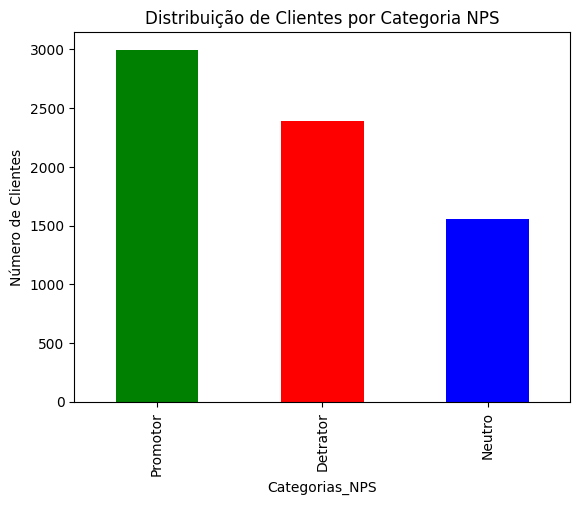

In [205]:
counts.plot(kind='bar', color=['green', 'red', 'blue']) #, color=['green', 'red', 'blue']
plt.title('Distribuição de Clientes por Categoria NPS')
plt.ylabel('Número de Clientes')
plt.show()

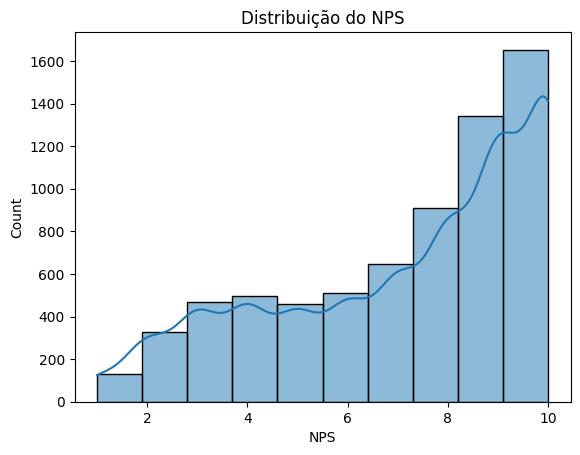

In [ ]:
#sns.histplot(data=df_limpo, x='NPS', bins=10, kde=True)
#plt.title('Distribuição do NPS')
#plt.show()

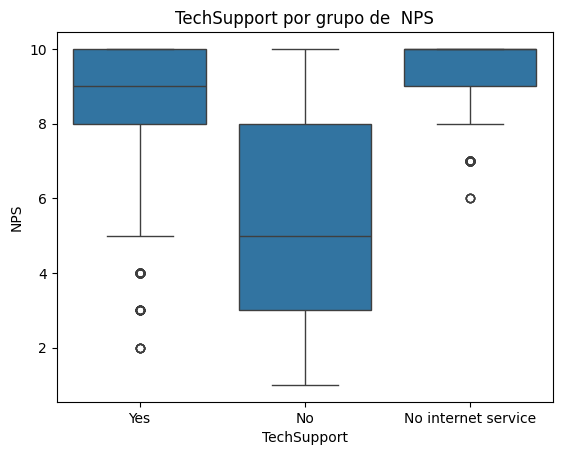

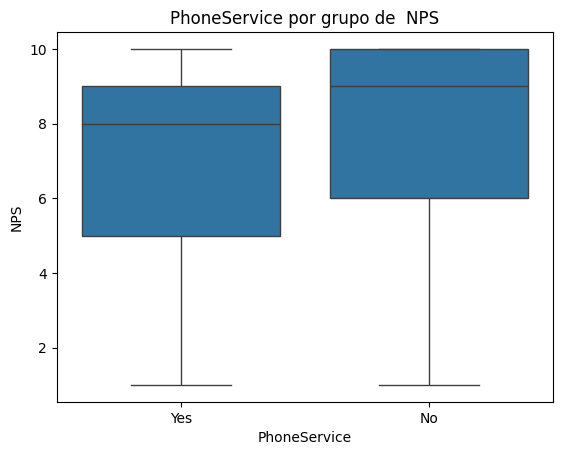

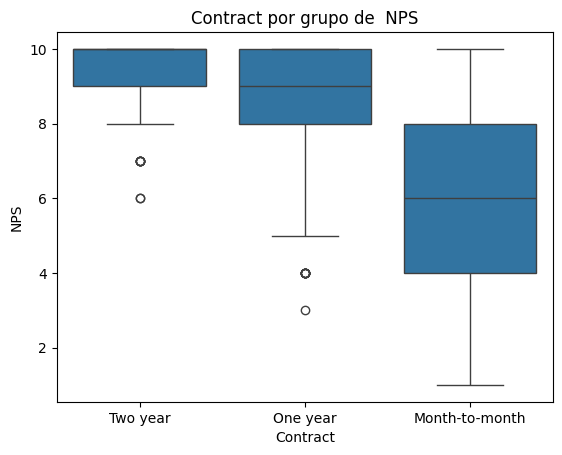

In [229]:
nome_cols = ['TechSupport','PhoneService', 'Contract' ]

for col in nome_cols:
    sns.boxplot(data=df_limpo, x=col, y='NPS')
    plt.title(f"{col} por grupo de  NPS")
    plt.show()

In [ ]:
nps_score = (df_limpo[df_limpo['NPS'] >= 9].shape[0] / df_limpo.shape[0] * 100) - (df_limpo[df_limpo['NPS'] <= 6].shape[0] / df_limpo.shape[0] * 100)
print(f"NPS Agregado: {nps_score:.2f}")

NPS Agregado: 8.68


<Axes: xlabel='Churn', ylabel='TotalServicosContratados'>

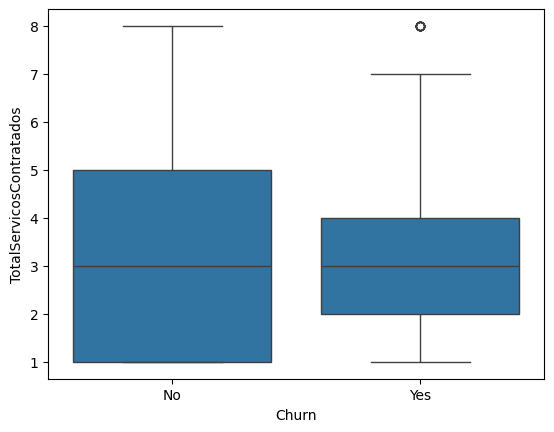

In [199]:
sns.boxplot(data=df_limpo, x='Churn', y='TotalServicosContratados')


<Axes: xlabel='TotalServicosContratados', ylabel='NPS'>

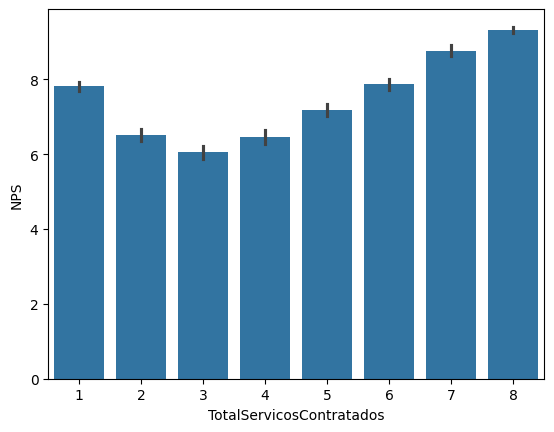

In [200]:
sns.barplot(data=df_limpo, x='TotalServicosContratados', y='NPS')


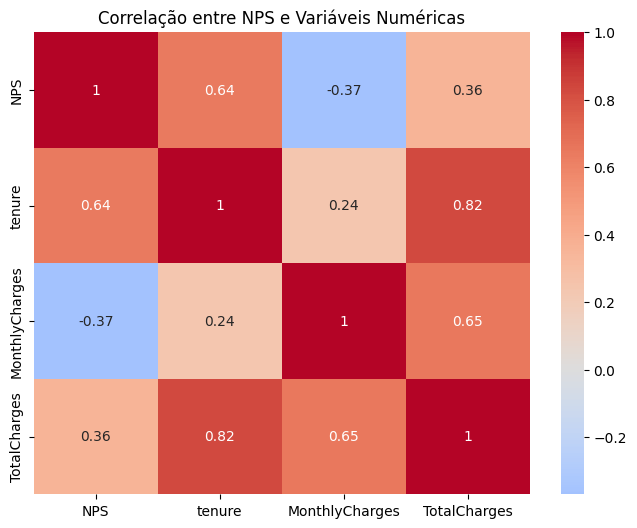

In [201]:
# Selecionar variáveis numéricas
numerical_vars = ['NPS', 'tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df_limpo[numerical_vars].corr()

# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre NPS e Variáveis Numéricas')
plt.show()

A análise da matriz de correlação entre o NPS e as variáveis numéricas do conjunto de dados revela algumas relações importantes. O primeiro ponto a destacar é a correlação positiva moderada entre o NPS e o tempo de permanência (tenure), com valor de 0,64. Isso sugere que clientes com mais tempo de relacionamento tendem a apresentar maiores índices de satisfação, reforçando a importância da retenção de longo prazo para a melhoria do NPS.

Por outro lado, observa-se uma correlação negativa (-0,37) entre o NPS e os gastos mensais (MonthlyCharges). Esse resultado indica que clientes com cobranças mensais mais elevadas tendem a demonstrar menor satisfação, o que está alinhado com o alto **Churn** visto nesta região na análise anterior. Já o total gasto (TotalCharges) apresenta uma correlação positiva fraca (0,36), com o NPS, sinalizando que o acúmulo de gastos ao longo do tempo não reduz a satisfação. 

Além disso, é relevante notar a forte correlação entre algumas variáveis explicativas, como tenure e TotalCharges (0,82), reflexo natural de que o tempo de permanência impacta diretamente no valor acumulado

 Essa evidência sugere que estratégias voltadas à retenção de clientes e ao equilíbrio nos planos de cobrança podem ser determinantes para a melhoria do NPS.